C:\Users\YENNY\AppData\Local\Temp\ipykernel_25940\3051942958.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='servicio', data=df, order=df['servicio'].value_counts().index, palette='viridis')


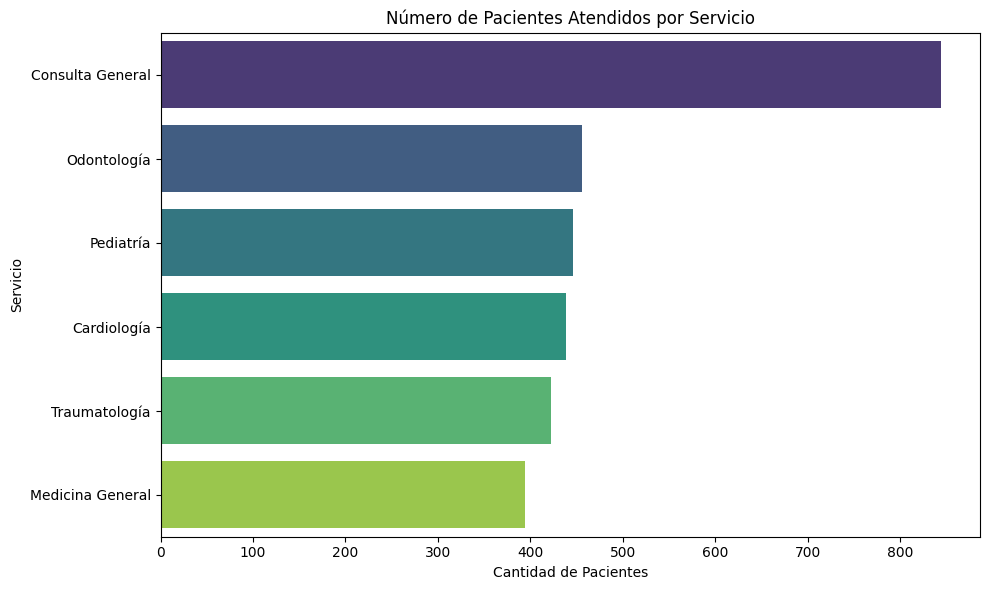

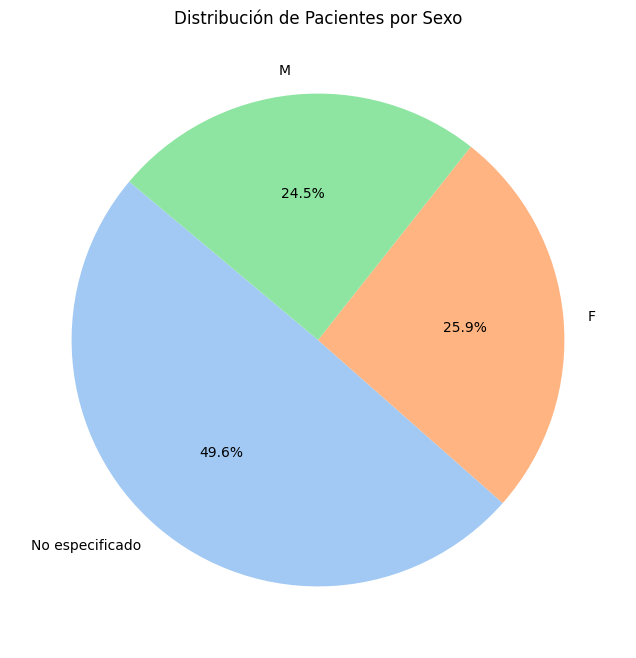

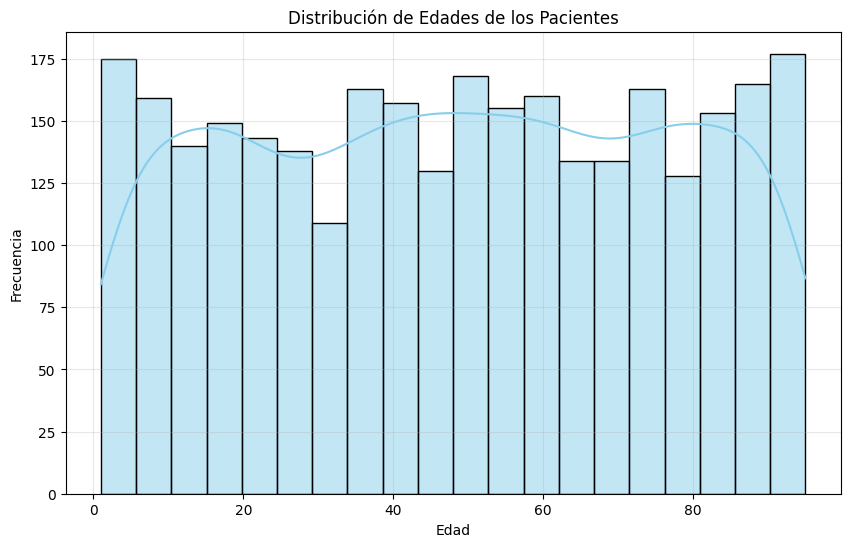

--- Promedio de Montos por Distrito ---
     distrito       monto
0       Lince  290.662483
1  San Isidro  286.620069
2       Surco  276.338266
3   La Molina  273.382930
4  Miraflores  272.973272
5       Comas  272.358605
6         SJL  264.702381


C:\Users\YENNY\AppData\Local\Temp\ipykernel_25940\3051942958.py:56: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=promedio_distrito, x='monto', y='distrito', palette='coolwarm')


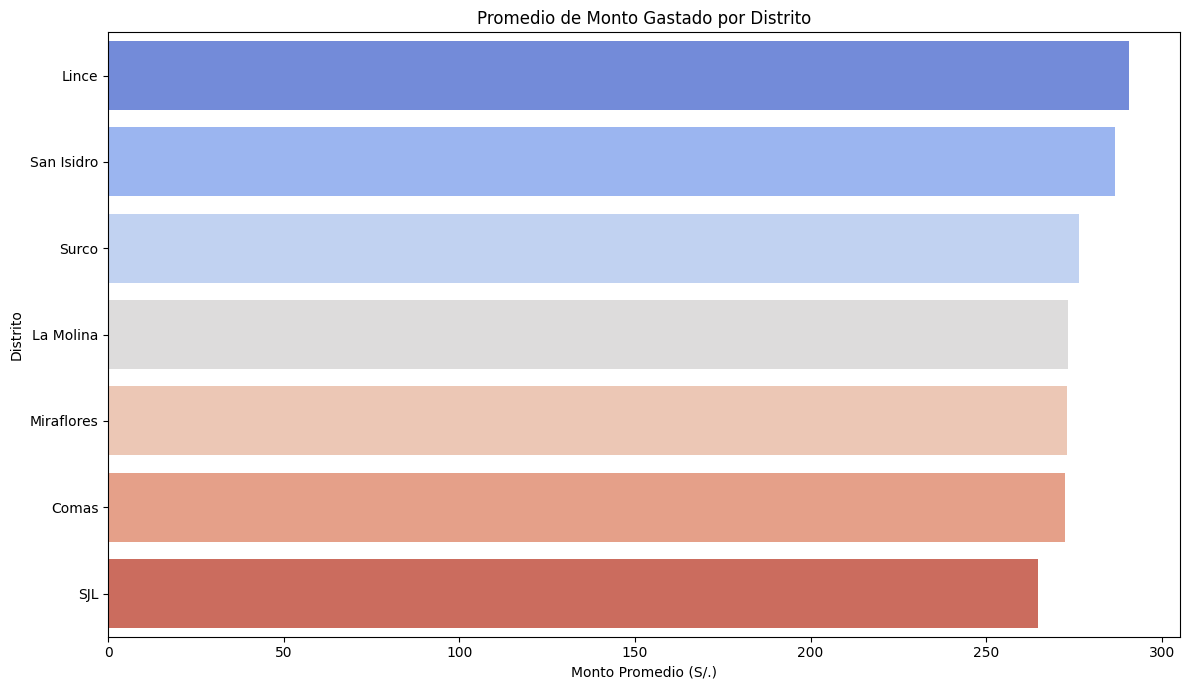

In [1]:
# scripts/6_Reportes.ipynb

import pandas as pd
from pymongo import MongoClient
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

# Conectar a MongoDB y cargar datos
client = MongoClient("mongodb://localhost:27017/")
db = client["SaludDigital_2025"]
collection = db["pacientes"]
data = list(collection.find({}, {"_id": 0}))
df = pd.DataFrame(data)
client.close()

# Ruta para guardar los reportes
reports_path = Path.cwd().parent / "reports"

# --- 1. Gráfico de barras: Pacientes por servicio ---
plt.figure(figsize=(10, 6))
sns.countplot(y='servicio', data=df, order=df['servicio'].value_counts().index, palette='viridis')
plt.title('Número de Pacientes Atendidos por Servicio')
plt.xlabel('Cantidad de Pacientes')
plt.ylabel('Servicio')
plt.tight_layout()
plt.savefig(reports_path / "pacientes_atendidos_por_servicio.png")
plt.show()

# --- 2. Gráfico circular: Distribución por sexo ---
sexo_counts = df['sexo'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(sexo_counts, labels=sexo_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))
plt.title('Distribución de Pacientes por Sexo')
plt.ylabel('')
plt.savefig(reports_path / "distribucion_por_sexo.png")
plt.show()

# --- 3. Histograma: Distribución de edades ---
plt.figure(figsize=(10, 6))
sns.histplot(df['edad'], bins=20, kde=True, color='skyblue')
plt.title('Distribución de Edades de los Pacientes')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.grid(True, alpha=0.3)
plt.savefig(reports_path / "distribucion_de_edades.png")
plt.show()

# --- 4. Reporte tabular: Promedio de montos por distrito ---
promedio_distrito = df.groupby('distrito')['monto'].mean().sort_values(ascending=False).reset_index()
print("--- Promedio de Montos por Distrito ---")
print(promedio_distrito)

# Gráfico para el reporte tabular
plt.figure(figsize=(12, 7))
sns.barplot(data=promedio_distrito, x='monto', y='distrito', palette='coolwarm')
plt.title('Promedio de Monto Gastado por Distrito')
plt.xlabel('Monto Promedio (S/.)')
plt.ylabel('Distrito')
plt.tight_layout()
plt.savefig(reports_path / "promedio_de_montos_por_distrito.png")
plt.show()